# Regression & Finding Best Fit Curve
## Week 14
Regression searches for relationships among variables. For example, you can observe several employees of some company and try to understand how their salaries depend on their features, such as experience, education level, role, city of employment, and so on.

In statistical modeling, a best fit curve is a curve that is the best approximation of the data points. This curve is found by minimizing the sum of the squares of the differences between the data points and the curve. The resulting curve is often used to make predictions about the response variable based on the predictor variable. The type of curve that is used as the best fit curve depends on the nature of the data and the type of relationship that is expected between the variables. Some common types of best fit curves include linear curves, polynomial curves, and exponential curves.

<p align="center"><img src="https://miro.medium.com/max/720/1*bnc6XQfNbXR6QIX3tNVK8g.webp"></p>

> [source](https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509)

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cv2
from astropy.io import fits
import statistics
import math
from scipy.optimize import curve_fit

## Testing Best Fit Line

In [4]:
x = np.array([1, 5, 15, 16, 18, 25, 26, 29, 31, 35, 45, 46, 47, 55]).reshape((-1, 1))
y = np.array([2, 5, 20, 14, 7, 32, 14, 22, 38, 40, 26, 30, 50, 55])

print(f"x is: \n{x}\ny is: \n{y}")
print(f"shape of x: {np.shape(x)}\nshape of y: {np.shape(y)}")

x is: 
[[ 1]
 [ 5]
 [15]
 [16]
 [18]
 [25]
 [26]
 [29]
 [31]
 [35]
 [45]
 [46]
 [47]
 [55]]
y is: 
[ 2  5 20 14  7 32 14 22 38 40 26 30 50 55]
shape of x: (14, 1)
shape of y: (14,)


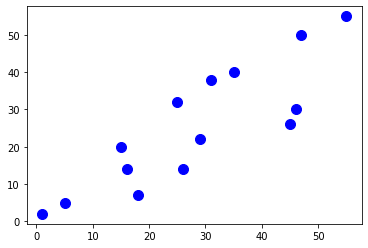

In [5]:
fig, ax = plt.subplots()
ax.scatter(x, y, s=100, c='blue')
plt.show()

In [6]:
model = LinearRegression().fit(x, y)

## Coefficient of Determination $R^2$
Once you have your model fitted, you can get the results to check whether the model works satisfactorily and to interpret it. The coefficient of determination, is a measure of the strength of the relationship between a predictor variable and a response variable in a statistical model. It is defined as the square of the Pearson correlation coefficient between the predictor and response variables.

$$\Large R^2 = \left(\frac{\sum\limits_{i=1}^n (\hat{y}i - \bar{y})(x_i - \bar{x})}{\sqrt{\sum\limits{i=1}^n (\hat{y}i - \bar{y})^2}\sqrt{\sum\limits{i=1}^n (x_i - \bar{x})^2}}\right)^2$$

> Where:
> - $\hat{y}_i$ is the predicted value of the response variable for the $i$th data point
> - $\bar{y}$ is the mean of the response variable
> - $x_i$ is the value of the predictor variable for the $i$th data point
> - $\bar{x}$ is the mean of the predictor variable. The symbol $\rho$ represents the Pearson correlation coefficient.

In [8]:
r_sq = model.score(x, y)
intercept = model.intercept_
slope = model.coef_
print(f"coefficient of determination: {r_sq}")
print(f"In y = mx + b, the slop is: {slope}, and the intercept is: {intercept}")

coefficient of determination: 0.7374695196216683
In y = mx + b, the slop is: [0.86811774], and the intercept is: 0.9258291873963493


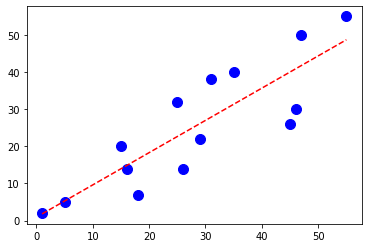

In [9]:
fig, ax = plt.subplots()
ax.scatter(x, y, s=100, c='blue')
ax.plot(x, [slope * xi + intercept for xi in x], c='red', linestyle='dashed')
plt.show()

## Trying on Pillars
Now, the same technique will be used to find the best fitting curve/line on the `m16` FITS data. It should be noted that a curve will fit the exponential nature of the intensity vs. number of stars better.

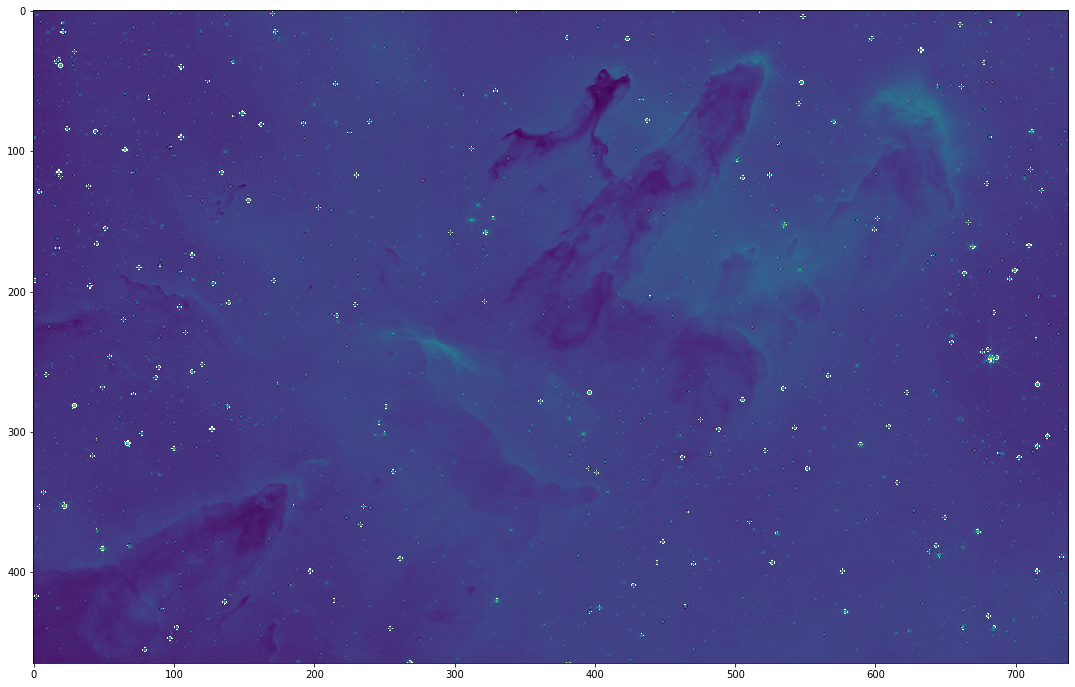

In [10]:
hdulist = fits.open("m16_nircam.fits")
data = hdulist[0].data
image_data = hdulist[0].data
plt.figure(figsize = (20, 12))
plt.imshow(image_data, norm=LogNorm(), interpolation='blackman')

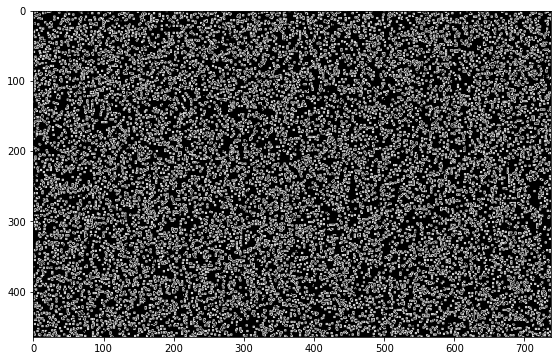

In [12]:
img = cv2.imread("prof_processed_image.jpg")
edges = cv2.Canny(img, 100, 200)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.figure(figsize = (10,6))
plt.imshow(edges, "gray")

In [13]:
results = []

for i in range(len(contours)):
    max_x = float('-inf')
    min_x = float('inf')
    max_y = float('-inf')
    min_y = float('inf')
    for j in range(len(contours[i])):
        x, y = contours[i][j][0] 
        max_x = max(max_x, x)
        min_x = min(min_x, x)
        max_y = max(max_y, y)
        min_y = min(min_y, y)
    results.append([min_x, max_x, min_y, max_y])

y_range, x_range = data.shape

intensity_list = []

for i in range(len(results)):
    intensity = 0
    for j in range(results[i][0], results[i][1]+1):
        for k in range(results[i][2], results[i][3]+1):
            intensity += data[k, j]
    intensity_list.append(intensity)

hdulist.close()

In [14]:
print(f"length of the list of intensities: {len(intensity_list)}")
print(f"minimum value in the list of intensities: {min(intensity_list)}")

sorted_intensity = sorted(intensity_list, reverse=True)

intensity_list_updated = []
cnt = 0
thresh = 380

for obj in intensity_list:
    if obj >= thresh:
        cnt += 1
        intensity_list_updated.append(obj)

print(f"number of values above the {thresh} threshold: {cnt}")

np.savetxt('data.csv', intensity_list_updated, delimiter=',')

length of the list of intensities: 15734
minimum value in the list of intensities: 18.340776443481445
number of values above the 380 threshold: 9774


Number of Stars in the whole image: 9774
mean is: 1061.2649479955405
standard deviation is: 1504.085415699821
shape of the updated list of intensities: (9774,)
list of updated intensities: 
[990.8595237731934, 558.8956489562988, 646.6881523132324, 646.6881523132324, 620.8407897949219, 495.19051361083984, 618.7521915435791, 573.5207805633545, 386.0831718444824, 386.0831718444824, 387.5017433166504, 387.5017433166504, 711.5782699584961, 398.35094833374023, 1211.4438667297363, 391.3641471862793, 388.03347396850586, 923.4999885559082, 414.2547149658203, 554.7670860290527, 403.50536727905273, 403.50536727905273, 434.468563079834, 434.468563079834, 539.4435386657715, 404.04295349121094, 414.18164825439453, 414.18164825439453, 604.572380065918, 1317.680118560791, 514.7857666015625, 1011.4403610229492, 528.4939365386963, 393.6056213378906, 1983.4548721313477, 1133.6562767028809, 411.56506729125977, 415.691349029541, 1164.5257568359375, 399.79790115356445, 399.79790115356445, 693.4393615722656,

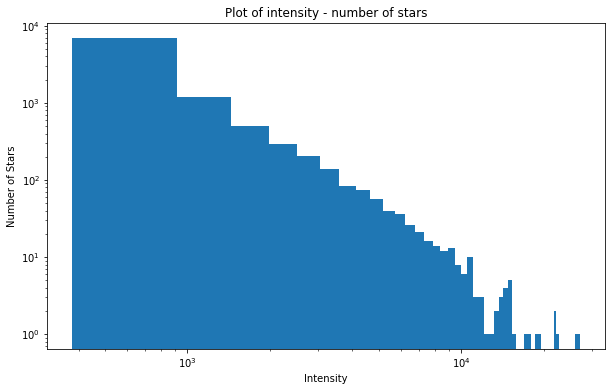

In [16]:
min_num = int(min(intensity_list_updated))
max_num = int(max(intensity_list_updated))
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(intensity_list_updated, bins=50)
ax.set_title("Plot of intensity - number of stars")
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel("Intensity")
plt.ylabel("Number of Stars")

print(f'Number of Stars in the whole image: {len(intensity_list_updated)}')

mean = np.mean(intensity_list_updated)
std = np.std(intensity_list_updated)
print(f"mean is: {mean}\nstandard deviation is: {std}")

print(f"shape of the updated list of intensities: {np.shape(intensity_list_updated)}")
print(f"list of updated intensities: \n{intensity_list_updated}")

plt.show()

In [17]:
mini = min(intensity_list_updated)
maxi = max(intensity_list_updated)
print("updated min intensity =", mini)
print("updated max intensity =", maxi)
print("range of buckets per 1000 buckets =", (maxi - mini)/1000)

updated min intensity = 380.02243423461914
updated max intensity = 27076.101318359375
range of buckets per 1000 buckets = 26.696078884124756


Here, a size of 1000 buckets has been chosen to graph the data.

## Curve Fitting
Curve fitting is the process of finding the best curve to approximate a set of data points. 

There are many different techniques that can be used for curve fitting. They involve fitting a curve to the data by minimizing the sum of the squares of the differences between the data points and the curve.

In [20]:
bucketsfinal = []
bucket1 = []
flag = True
i = 0

while flag:
    for i in range(len(intensity_list_updated)):
        if (intensity_list_updated[i] > mini) and (intensity_list_updated[i] < (mini + 27)):
            bucket1.append(intensity_list_updated[i])
    bucketsfinal.append(bucket1)
    mini = mini + 27
    bucket1 = []
    if len(bucketsfinal) == 1000:
        break

lens = []
medians = []
for i in range(1000):
    lens.append(len(bucketsfinal[i]))
    if len(bucketsfinal[i]) > 0:
        medians.append(statistics.median(bucketsfinal[i]))
    else:
        medians.append(0)

nums = 0
for i in range(len(intensity_list_updated)):
    if (intensity_list_updated[i] > 990) and (intensity_list_updated[i] < 1010):
        nums += 1
print("total number of intensities between 990 & 1010 =", nums)

lenslog = []
for i in range(len(lens)):
    if lens[i] > 0:
        lenslog.append(math.log(lens[i]))
    else:
        lenslog.append(lens[i])

medianslog = []
for i in range(len(medians)):
    if medians[i] > 0:
        medianslog.append(math.log(medians[i]))
    else:
        medianslog.append(medians[i])

def curve(x, m, b):
    return m*x + b

# fit the curve to the data using the `curve_fit()` function
params, params_covariance = curve_fit(curve, medianslog, lenslog)

print("parameters are:", params)
print(f"log(numbers) = {-params[0]} * log(intensity) + {params[1]}")

total number of intensities between 990 & 1010 = 58
parameters are: [0.14967724 0.08096596]
log(numbers) = -0.14967724453716968 * log(intensity) + 0.08096595652259753


## Mathematical Formula
Based on the previous findings, the equation can be formulated as:
$$\Large \log(N) = -0.14968 \times \log(I) + 0.08096$$

> Where:
> - $I$ represents the specific intensity
> - $N$ represents the number of stars having that intensity

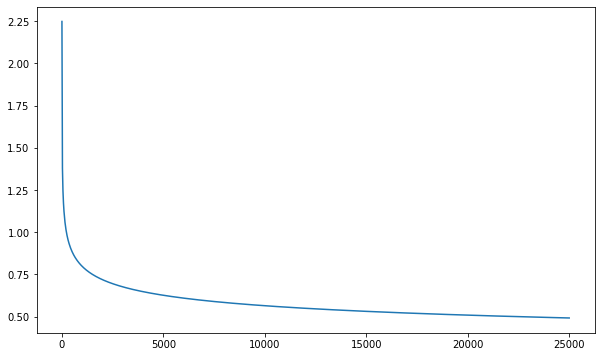

In [22]:
medians = np.linspace(1, 25000, 1000)
lens = np.exp(-0.15 * np.log(medians) + 0.81)
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(medians, lens)
plt.show()

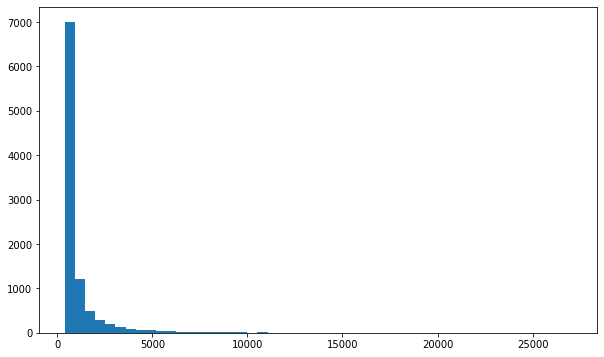

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(intensity_list_updated, bins = 50)
plt.show()

## Another Approach
Now, instead of setting the number of buckets, one can set the range of each bucket.

In [25]:
new_int_list = np.array(intensity_list_updated)
X = new_int_list.reshape(-1,1)
print(f"updated shape of the list: {np.shape(X)}")
print(f"the reshaped list of intensities: \n{X}")

updated shape of the list: (9774, 1)
the reshaped list of intensities: 
[[990.85952377]
 [558.89564896]
 [646.68815231]
 ...
 [759.35921097]
 [813.11980057]
 [438.1169548 ]]


In [29]:
bucket_range = 400
print("range of each bucket =", bucket_range)
bucket_counts = {}

for intensity in intensity_list_updated:
    bucket = int(intensity / bucket_range)
    # print(f"{intensity} / {bucket_range} = {bucket}")
    if bucket in bucket_counts:
        bucket_counts[bucket] += 1
    else:
        bucket_counts[bucket] = 1

print(f"the set bucket_counts is: \n{bucket_counts}")
sorted_bucket = sorted(bucket_counts.items())
print(sorted_bucket)
print(type(sorted_bucket))

range of each bucket = 400
the set bucket_counts is: 
{2: 1226, 1: 5174, 0: 1368, 3: 625, 4: 309, 5: 228, 12: 44, 11: 43, 7: 135, 6: 171, 19: 9, 16: 20, 25: 5, 17: 19, 8: 95, 14: 30, 9: 54, 10: 70, 13: 32, 18: 11, 26: 8, 33: 2, 22: 12, 21: 6, 15: 19, 36: 2, 49: 1, 28: 2, 20: 11, 38: 3, 23: 9, 35: 4, 24: 6, 37: 3, 43: 1, 27: 4, 56: 1, 55: 2, 67: 1, 31: 2, 65: 1, 34: 1, 29: 2, 30: 1, 44: 1, 46: 1}
[(0, 1368), (1, 5174), (2, 1226), (3, 625), (4, 309), (5, 228), (6, 171), (7, 135), (8, 95), (9, 54), (10, 70), (11, 43), (12, 44), (13, 32), (14, 30), (15, 19), (16, 20), (17, 19), (18, 11), (19, 9), (20, 11), (21, 6), (22, 12), (23, 9), (24, 6), (25, 5), (26, 8), (27, 4), (28, 2), (29, 2), (30, 1), (31, 2), (33, 2), (34, 1), (35, 4), (36, 2), (37, 3), (38, 3), (43, 1), (44, 1), (46, 1), (49, 1), (55, 2), (56, 1), (65, 1), (67, 1)]
<class 'list'>


Here, the key represents the range of intensities, e.g.:
for `{2: 1226}` where range is `400`, we have 1226 numbers that are in the range of `[800, 1199]`, since `int(800 / 400) = int(1199 / 400) = 2`. 

In [30]:
buckets, counts = zip(*sorted_bucket)
print(f"buckets are: \n{buckets}\ncounts are: \n{counts}")
print(f"type of buckets and counts: {type(buckets)} & {type(counts)}")

buckets are: 
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 43, 44, 46, 49, 55, 56, 65, 67)
counts are: 
(1368, 5174, 1226, 625, 309, 228, 171, 135, 95, 54, 70, 43, 44, 32, 30, 19, 20, 19, 11, 9, 11, 6, 12, 9, 6, 5, 8, 4, 2, 2, 1, 2, 2, 1, 4, 2, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1)
type of buckets and counts: <class 'tuple'> & <class 'tuple'>


## Plotting Time
In their order of appearance, each intensity-number plot represents the data in different scales:
1. Normal scale
2. Only $\log(y)$, normal $x$
3. Both logarithmic scale

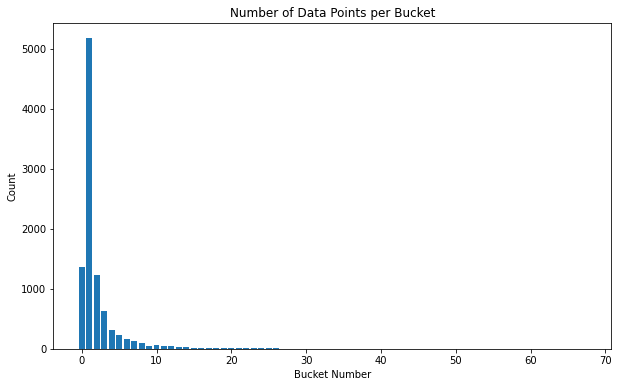

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(buckets, counts)
plt.xlabel('Bucket Number')
plt.ylabel('Count')
plt.title('Number of Data Points per Bucket')
plt.show()

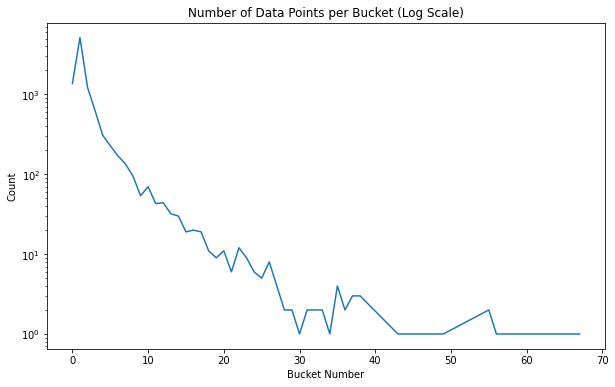

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogy(buckets, counts)
plt.xlabel('Bucket Number')
plt.ylabel('Count')
plt.title('Number of Data Points per Bucket (Log Scale)')
plt.show()

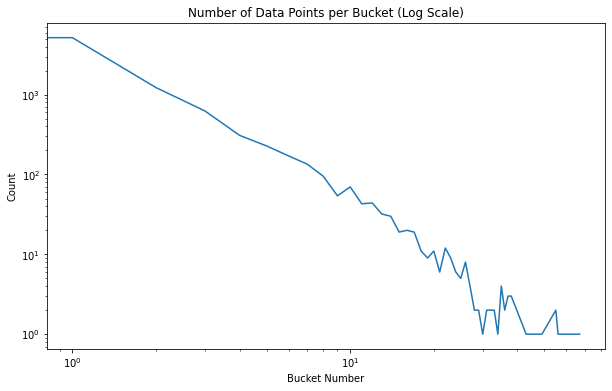

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.loglog(buckets, counts)
plt.xlabel('Bucket Number')
plt.ylabel('Count')
plt.title('Number of Data Points per Bucket (Log Scale)')
plt.show()

As one can observe, when both axis are represented in their log scale, a linear trend can be seen. This downward leaning pattern corresponds correctly with initial predictions of:

*"The higher the intensity, the fewer the stars."*

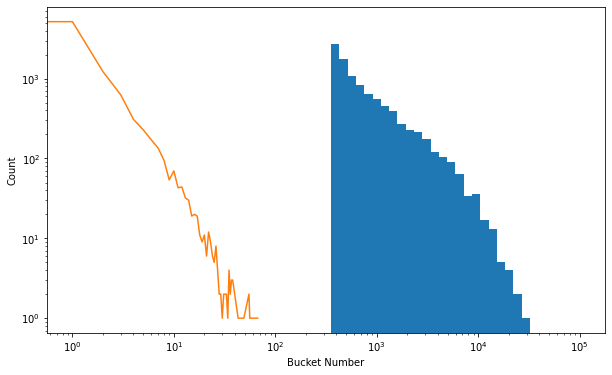

In [34]:
buckets, counts = zip(*sorted_bucket)
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(intensity_list_updated, bins=np.logspace(np.log10(10),np.log10(100000), 50))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

plt.loglog(buckets, counts)
plt.xlabel('Bucket Number')
plt.ylabel('Count')
plt.show()

In [56]:
X = np.array(buckets).reshape(-1,1)
y = np.array(counts)

star_model = LinearRegression().fit(X, y)
coeff_determination = star_model.score(X, y)
slope = star_model.coef_
intercept = star_model.intercept_

print(f"coefficient of determination = {coeff_determination}\nslope = {slope}\nintercept = {intercept}")

coefficient of determination = 0.24646201923322775
slope = [-1.95689103]
intercept = 112.53880314626252


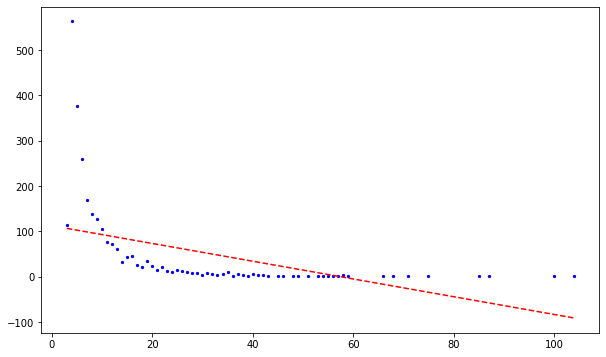

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y, s=5, c='blue')
ax.plot(X, [slope * xi + intercept for xi in X], c='red', linestyle='dashed')
plt.show()

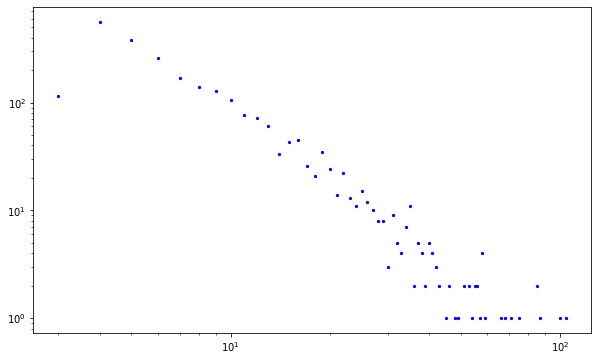

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X, y, s=5, c='blue')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.show()

## Different Thresholds
Now, by increasing the threshold from 380 to 1001, a better correlation can be found.

In [59]:
print(f"length of the list of intensities: {len(intensity_list)}")
print(f"minimum value in the list of intensities: {min(intensity_list)}")

sorted_intensity = sorted(intensity_list, reverse=True)

intensity_list_updated = []
cnt = 0
thresh = 1001

for obj in intensity_list:
    if obj >= thresh:
        cnt += 1
        intensity_list_updated.append(obj)

print(f"number of values above the {thresh} threshold: {cnt}")

length of the list of intensities: 15734
minimum value in the list of intensities: 18.340776443481445
number of values above the 1001 threshold: 2501


Number of Stars in the whole image: 2501
mean is: 2594.6504663744245
standard deviation is: 2367.768813459688


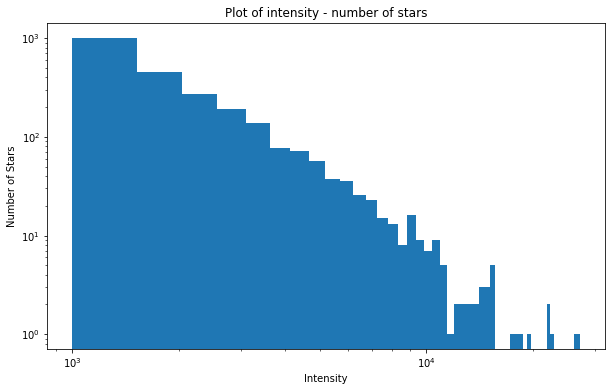

In [60]:
min_num = int(min(intensity_list_updated))
max_num = int(max(intensity_list_updated))
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(intensity_list_updated, bins=50)
ax.set_title("Plot of intensity - number of stars")
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel("Intensity")
plt.ylabel("Number of Stars")

print(f'Number of Stars in the whole image: {len(intensity_list_updated)}')

mean = np.mean(intensity_list_updated)
std = np.std(intensity_list_updated)
print(f"mean is: {mean}\nstandard deviation is: {std}")

plt.show()

In [61]:
new_int_list = np.array(intensity_list_updated)
X = new_int_list.reshape(-1,1)
print(f"updated shape of the list: {np.shape(X)}")
print(f"the reshaped list of intensities: \n{X}")

updated shape of the list: (2501, 1)
the reshaped list of intensities: 
[[1211.44386673]
 [1317.68011856]
 [1011.44036102]
 ...
 [3343.30846405]
 [3532.4210434 ]
 [1107.56814766]]


In [62]:
bucket_range = int((max(intensity_list_updated) - min(intensity_list_updated)) / 100)
bucket_counts = {}

for intensity in intensity_list_updated:
    bucket = int(intensity / bucket_range)
    # print(f"{intensity} / {bucket_range} = {bucket}")
    if bucket in bucket_counts:
        bucket_counts[bucket] += 1
    else:
        bucket_counts[bucket] = 1

sorted_bucket = sorted(bucket_counts.items())
buckets, counts = zip(*sorted_bucket)
print(f"buckets are: \n{buckets}\ncounts are: \n{counts}")
print(f"type of buckets and counts: {type(buckets)} & {type(counts)}")

buckets are: 
(3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 51, 53, 54, 55, 56, 57, 58, 59, 66, 68, 71, 75, 85, 87, 100, 104)
counts are: 
(115, 563, 377, 260, 170, 138, 127, 106, 77, 72, 61, 33, 43, 45, 26, 21, 35, 24, 14, 22, 13, 11, 15, 12, 10, 8, 8, 3, 9, 5, 4, 7, 11, 2, 5, 4, 2, 5, 4, 3, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1)
type of buckets and counts: <class 'tuple'> & <class 'tuple'>


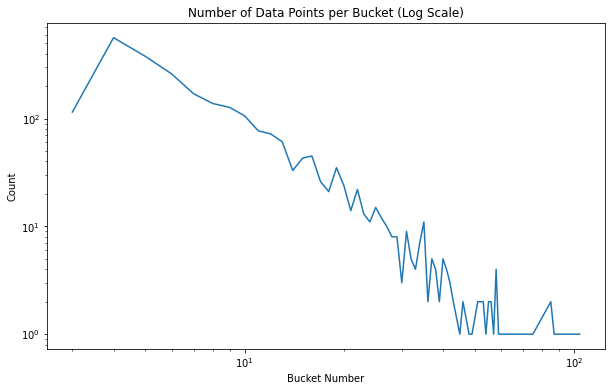

In [63]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.loglog(buckets, counts)
plt.xlabel('Bucket Number')
plt.ylabel('Count')
plt.title('Number of Data Points per Bucket (Log Scale)')
plt.show()

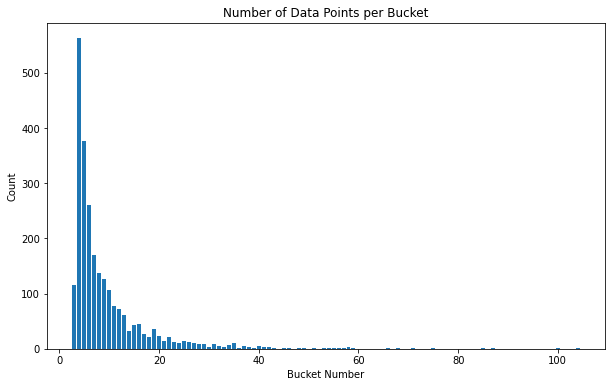

In [64]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.bar(buckets, counts)
plt.xlabel('Bucket Number')
plt.ylabel('Count')
plt.title('Number of Data Points per Bucket')
plt.show()

## Another Scale
Now this time, setting the $y$ scale as logarithmic from the very beginning will give us:

In [65]:
X = np.array(buckets).reshape(-1,1)
y = np.array(counts)
y = [np.log(w) for w in y]

star_model = LinearRegression().fit(X, y)
coeff_determination = star_model.score(X, y)
slope = star_model.coef_
intercept = star_model.intercept_

print(f"coefficient of determination = {coeff_determination}\nslope = {slope}\nintercept = {intercept}")

coefficient of determination = 0.7418312620853642
slope = [-0.06416629]
intercept = 4.422324992172783


As one can see, the new coefficient of determination is much higher than the previous one ($0.74 > 0.12$). It is difficult to say whether a certain coefficient of determination is good or bad, but in general, a higher $R^2$ value is better, because it means that the model is explaining more of the variance in the dependent variable.

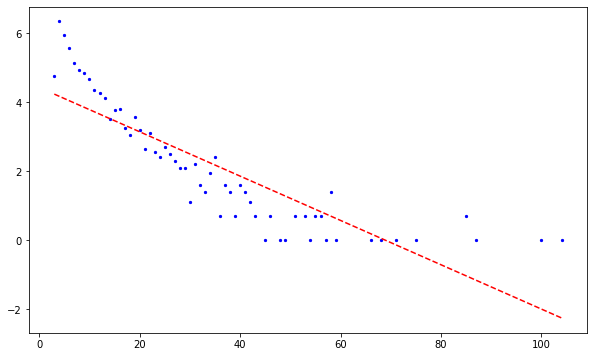

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y, s=5, c='blue')
ax.plot(X, [slope * xi + intercept for xi in X], c='red', linestyle='dashed')
plt.show()

## Conclusion
Working with best fit curves and lines provides insight into the future behavior of the data. However, a curve suits this dataset better, since it does not follow a linear trend (unless the logarithm of the data is taken).